# APS1070
#### Anomaly Detection - Project 2



Project 2 has two parts: a tutorial component (which will be covered in labs) and an exercises component (to be completed as homework, individually). Overall, this project is worth 12.5% of your final grade. Completing the tutorial section is worth 2.5 marks. The exercises section will be graded out of the remaining 10 marks.


Please fill out the following:


*   Your **name**:Peiyao Li
*   Your **student number**:1000674371



## Tutorial

In this part of the assignment, we will implement an anomaly detection algorithm using the Gaussian model to detect anomalous behavior in a 2D dataset first and then a high-dimensional dataset.

Loading relevant libraries and the dataset

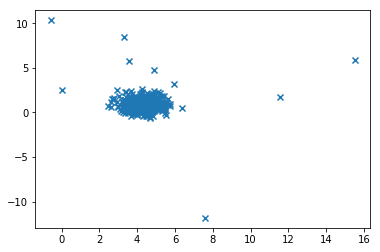

In [58]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=1,
                       cluster_std=0.60, random_state=0)
X_append, y_true_append = make_blobs(n_samples=10,centers=1,
                                    cluster_std=5,random_state=0)
X = np.vstack([X,X_append])
y_true = np.hstack([y_true, [1 for _ in y_true_append]])
X = X[:, ::-1] # flip axes for better plotting
plt.scatter(X[:,0],X[:,1],marker="x");

In [59]:
print (y_true_append)
print(y_true)
print(X_append)
#print(X)

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1]
[[  4.7814587    4.91216241]
 [ 10.31406003  -0.58260207]
 [-11.788679     7.5718803 ]
 [  3.19558624   5.97215896]
 [  5.86996     15.50825332]


Here we've manufactured a dataset where some points are visibly outliers from the main distribution.

We can see this from looking at the plot, but how do we robustly identify the outliers? 

That's where a Gaussian estimation comes in. For this dataset, we only need a single Gaussian, for which we are gonna calculate the mean and standard deviation. Then, we're able to find the points that don't seem likely to have originated from that distribution - these are our outliers!

First, we need to calculate the mean and variance for our data. Complete the function below to generate these values using these formulae:

$$\mu = \frac{1}{m} \sum_{i=1}^{m}X_i$$

$$\sigma^2 = \frac{1}{m} \sum_{i=1}^{m}(X_i-\mu)^2$$

In [60]:
def estimateGaussian(X):
    """
     This function provides an estimate of mean and variance 
     of a Gaussian distribution along multiple dimensions
     using X, an N-dimensional vector
    """
    
    m = X.shape[0] #number of rows
    
    #compute mean of X
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    
    # compute variance of X
    var = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,var
mu, sigma = estimateGaussian(X)
print("mu and sigma respectively are :", mu,sigma)

mu and sigma respectively are : [4.30770882 0.9756171 ] [0.94147734 1.25990509]


Now, we will calculate for each point in X, the probability of the distribution $N(\mu,\sigma^2)$ generating that point randomly. This has been completed for you, although it is important to understand how the calculation of the PDF works.

In [61]:
def multivariateGaussian(X, mu, sigma):
    """
    This function computes the probability density function of a multivariate gaussian distribution.
    """
    k = len(mu)
    
    sigma=np.diag(sigma)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma) * X,axis=1))
    return p
p = multivariateGaussian(X, mu, sigma)
#print(p)
#
print(len(mu))

2


Now that we have the probability of each point in the dataset, we can plot these on the original scatterplot:

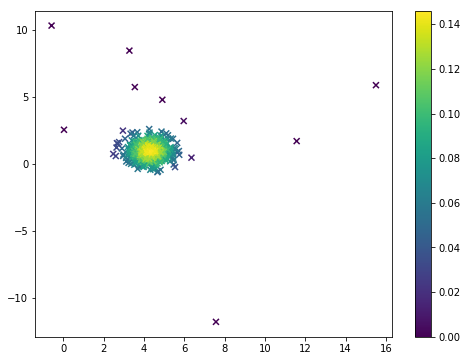

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
plt.colorbar();

We're getting closer to the point where we can programatically identify our outliers for a single Gaussian distribution. The last step is to identify a value for $p$, below which we consider a point to be an outlier. We term this $\epsilon$.

In [0]:
#Choose a value for epsilon

sorted_p = sorted(p)
#print(sorted_p)

epsilon = sorted_p[10]

Now we'll highlight on the scatter plot all points that are below $\epsilon$:

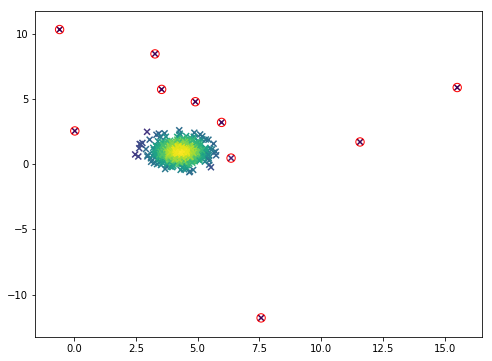

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x",c=p,cmap='viridis');
# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);

How well did your epsilon value do? Play around with different values until you're happy with the plot above. Answer: My epsilon value correctly identified all 10 outliers added as I've set it to be just above the 10 smallest probabilities.

We can additionally look at our model's classification performance another way. By sorting the points ascending by their probability, and classifying the first $k$ points as anomalous, we can determine the model's precision@k. Implement this in the cell below. 

* What is the highest value of K for which we get precision of 1.0? Answer: __K=10__
* What is the precision for K=4? Answer: __precision = 1__

In [65]:
from sklearn.metrics import precision_score
for i in range(15):

    mn = sorted_p[i]
    sc = precision_score(
            y_true, 1*(p<=mn)
        )
    print("k = {}: precision {} ".format(i+1, sc))
#p<=mn

k = 1: precision 1.0 
k = 2: precision 1.0 
k = 3: precision 1.0 
k = 4: precision 1.0 
k = 5: precision 1.0 
k = 6: precision 1.0 
k = 7: precision 1.0 
k = 8: precision 1.0 
k = 9: precision 1.0 
k = 10: precision 1.0 
k = 11: precision 0.9090909090909091 
k = 12: precision 0.8333333333333334 
k = 13: precision 0.7692307692307693 
k = 14: precision 0.7142857142857143 
k = 15: precision 0.6666666666666666 


You may have noticed that in this example, we are training and testing on the _entire_ dataset. This is absolutely not standard practice! You should _always_ split into a training and testing set. However, the reason that we can get away with this here is because we don't actually use labels at all during training - this is an _unsupervised_ machine learning task. Unsupervised learning methods are beneficial for anomaly detection because in the real world (i.e. testing!) we might come across types of outliers that we didn't see during training. We want to use a method that can handle this, and unsupervised methods are often better suited to this type of domain.

For the next section, we'll move to Mixture of Gaussian models. Take a look at the following dataset:

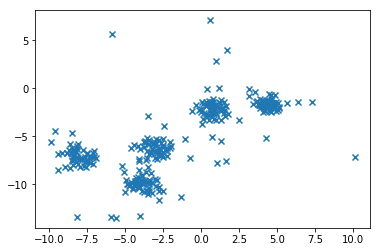

In [66]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
X, y_true = make_blobs(n_samples=400, centers=5,
                       cluster_std=0.60, random_state=1)
X_append, y_true_append = make_blobs(n_samples=50,centers=5,
                                    cluster_std=5,random_state=1)
X = np.vstack([X,X_append])
y_true = np.hstack([[0 for _ in y_true], [1 for _ in y_true_append]])
X = X[:, ::-1] # flip axes for better plotting

X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.33, random_state=1, shuffle=True)

plt.scatter(X_train[:,0],X_train[:,1],marker="x");

Okay, we have more than one cluster centre now. So what? Let's just ignore that and use the same model as before. 

* What is the precision for k=1 in the cell below? Answer:__Precision = 1.0__ 
* k=10?Answer:precision = __0.9__
* k=100? Answer:precision = __0.13__

In [67]:

mu, sigma = estimateGaussian(X_train)
p = multivariateGaussian(X_test, mu, sigma)
sorted_p = sorted(p)
from sklearn.metrics import precision_score
for i in range(100):

    mn = sorted_p[i]
    sc = precision_score(
            y_test, 1*(p<=mn)
        )
    print("k = {}: precision {} ".format(i+1, sc))

k = 1: precision 1.0 
k = 2: precision 1.0 
k = 3: precision 1.0 
k = 4: precision 1.0 
k = 5: precision 1.0 
k = 6: precision 1.0 
k = 7: precision 1.0 
k = 8: precision 1.0 
k = 9: precision 1.0 
k = 10: precision 0.9 
k = 11: precision 0.8181818181818182 
k = 12: precision 0.75 
k = 13: precision 0.7692307692307693 
k = 14: precision 0.7857142857142857 
k = 15: precision 0.7333333333333333 
k = 16: precision 0.6875 
k = 17: precision 0.6470588235294118 
k = 18: precision 0.6111111111111112 
k = 19: precision 0.5789473684210527 
k = 20: precision 0.55 
k = 21: precision 0.5238095238095238 
k = 22: precision 0.5 
k = 23: precision 0.4782608695652174 
k = 24: precision 0.4583333333333333 
k = 25: precision 0.44 
k = 26: precision 0.4230769230769231 
k = 27: precision 0.4074074074074074 
k = 28: precision 0.39285714285714285 
k = 29: precision 0.3793103448275862 
k = 30: precision 0.36666666666666664 
k = 31: precision 0.3548387096774194 
k = 32: precision 0.34375 
k = 33: precision 0.3

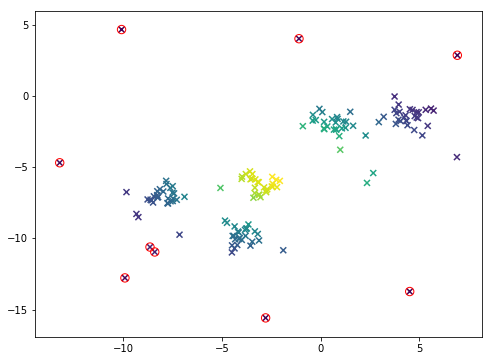

In [68]:
mu, sigma = estimateGaussian(X_train)
p = multivariateGaussian(X_test, mu, sigma)
plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0],X_test[:,1],marker="x",c=p,cmap='viridis');
outliers = np.nonzero(p<0.001)[0]
plt.scatter(X_test[outliers,0],X_test[outliers,1],marker="o",facecolor="none",edgecolor="r",s=70);


Uh oh. This model performs terribly. It's fit the mean to a section of space where we don't have _any_ points, and it has absolutely no idea which points are outliers! This was probably pretty obvious to you though. We need to move to a Mixture of Gaussians model - one in which we use multiple Gaussians to fit the data. We'll use `sklearn.mixture.GaussianMixture` to do this - or rather you will! Use the documentation, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) to initialise and fit a `GaussianMixture` object called `gm` in the cell below.

In [69]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components = 5,
                    covariance_type = 'full', random_state=0, )
gm.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=5, n_init=1, precisions_init=None,
                random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

Now we can use the method `gm.score_samples()` to get the probability of each data point being in any of the five clusters:

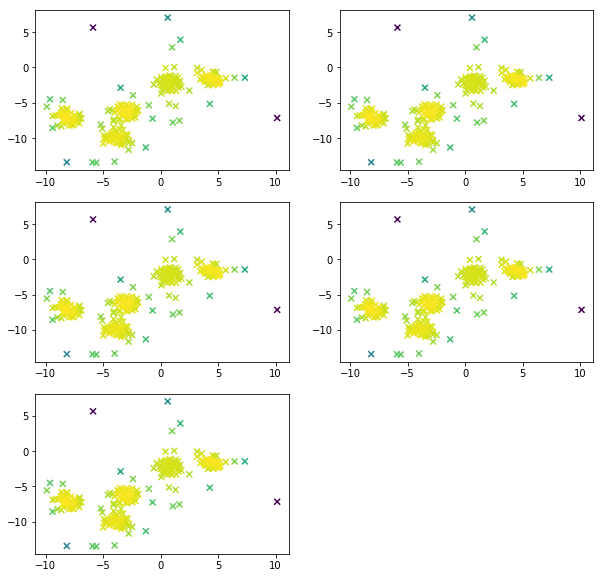

In [70]:
#plt.subplots(3,2,figsize=(8,6))
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.scatter(X_train[:,0],X_train[:,1],c=gm.score_samples(X_train),cmap='viridis',marker='x')

Our Mixture of Gaussians model is powerful! Not only is it unsupervised, it can both classify points into one of the K clusters we have, _and_ it can help us with our ultimate goal of identifying outlier points! We can do this by finding the points that no cluster wants to claim for itself.

Use the following formula to calculate the probability of each point, and set it to `p`:

$$p(x) = 1 - \bigg( \prod_{i=1}^{k} 1 - p(x \in k) \bigg)$$

This formula returns the probability that the datapoint was produced at random by _any_ of the Gaussians we fit. Hence, we want to filter out anything without a very high probability of this.

In the cell below, calculate these values and then compute precision@k for k =1, 10, and 100.: K_1 precision =1.0, K_10 precision = 1.0, and K_100 precision = 0.18

* Is this model better or worse performing than the previous? It performs better because Guassian Mixture have higher true positive rate as shown by the graph below, and higher precision score than the Single Component Model.

For a k of  1  the precision is  1.000  and the recall is  0.056
For a k of  10  the precision is  1.000  and the recall is  0.556
For a k of  100  the precision is  0.180  and the recall is  1.000


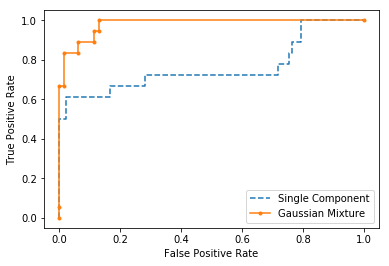

In [71]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#This part outputs the precision and recall on the test set
p_gm = gm.score_samples(X_test) #score_samples will compute the weighted log probabilities for each sample
for i in [1, 10, 100]: #Let's look at 3 different k values
   mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
   precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
   recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
   print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times
#This part computes the ROC curves for both models like we talked about in class

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr_sc, tpr_sc, _ = roc_curve(y_test, 1-p)
fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
pyplot.plot(fpr_sc, tpr_sc, linestyle = '--', label='Single Component')
pyplot.plot(fpr_gm, tpr_gm, marker='.', label='Gaussian Mixture')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()


In [72]:
#Corrected code using score_samples
ps =gm.score_samples(X_test) 
import numpy as np
np.asarray(ps)
p_new=[]
row=ps.shape[0]
#print(row)
for i in range(row):
#   print(ps[i])
  p_new.append(1-np.prod(1-ps[i])) 
#print(ps)
#for i, temp in enumerate(p_new):
  #print(temp, ps[i], y_test[i])

sorted_p = sorted(p_new)

from sklearn.metrics import precision_score
for i in range(100):

    mn = sorted_p[i]
    sc = precision_score(
            y_test, 1*(p_new<=mn)
        )
    print("k = {}: precision {} ".format(i+1, sc))



k = 1: precision 1.0 
k = 2: precision 1.0 
k = 3: precision 1.0 
k = 4: precision 1.0 
k = 5: precision 1.0 
k = 6: precision 1.0 
k = 7: precision 1.0 
k = 8: precision 1.0 
k = 9: precision 1.0 
k = 10: precision 1.0 
k = 11: precision 1.0 
k = 12: precision 1.0 
k = 13: precision 0.9230769230769231 
k = 14: precision 0.8571428571428571 
k = 15: precision 0.8666666666666667 
k = 16: precision 0.875 
k = 17: precision 0.8823529411764706 
k = 18: precision 0.8333333333333334 
k = 19: precision 0.7894736842105263 
k = 20: precision 0.75 
k = 21: precision 0.7142857142857143 
k = 22: precision 0.6818181818181818 
k = 23: precision 0.6521739130434783 
k = 24: precision 0.6666666666666666 
k = 25: precision 0.64 
k = 26: precision 0.6153846153846154 
k = 27: precision 0.5925925925925926 
k = 28: precision 0.5714285714285714 
k = 29: precision 0.5517241379310345 
k = 30: precision 0.5333333333333333 
k = 31: precision 0.5161290322580645 
k = 32: precision 0.53125 
k = 33: precision 0.51515

Although our MoG model doesn't perfectly identify all the outliers, it performs way better than our previous model, again without any label information to help it along! 

Let's look at a dataset that motivates using a Mixture of Gaussians model: Simpsons ratings.

Everyone knows that there's a certain point when The Simpsons "got bad", but can we use a Mixture of Gaussians to find out exactly when that was?

Load up the `simpsons.pickle` file using the cell below. It contains the IMDb rating for every simpsons episode.

In [73]:
!wget https://github.com/alexwolson/APS1070_data/raw/master/simpsons.pickle
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
with open('simpsons.pickle','rb') as f:
    simpsons = pickle.load(f)

--2019-10-18 19:49:44--  https://github.com/alexwolson/APS1070_data/raw/master/simpsons.pickle
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexwolson/APS1070_data/master/simpsons.pickle [following]
--2019-10-18 19:49:44--  https://raw.githubusercontent.com/alexwolson/APS1070_data/master/simpsons.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26076 (25K) [application/octet-stream]
Saving to: ‘simpsons.pickle.1’

simpsons.pickle.1   100%[===================>]  25.46K  --.-KB/s    in 0.01s   

2019-10-18 19:49:44 (2.07 MB/s) - ‘simpsons.pickle.1’ saved [26076/26076]



In [74]:
print(type(simpsons))
ratings =[]
season =[]
for key, val_dict in simpsons.items():  
  #print("key: {}, val: {}".format(key, val_dict))
  season_rating= list(val_dict.values())
  ratings.extend(season_rating)
  num_season = len(season_rating)
  key_l=[key]*num_season
  season.extend(key_l)
print(len(ratings), ratings)
print(len(season), season)
#   print(type(val_dict))
#   print(val_dict)
#   print(list(val_dict))
#   print(list(val_dict.values()))


<class 'dict'>
669 [6.2, 6.0, 6.1, 5.9, 7.0, 6.6, 5.8, 6.6, 6.8, 6.7, 5.7, 6.3, 6.9, 6.2, 6.4, 5.8, 6.3, 4.9, 6.2, 5.2, 5.3, 6.0, 5.9, 8.2, 7.8, 7.4, 7.7, 8.1, 7.6, 7.8, 7.7, 7.5, 7.4, 7.8, 8.4, 7.8, 8.2, 8.3, 8.3, 8.1, 7.5, 8.0, 7.8, 8.4, 8.1, 7.8, 8.8, 8.3, 8.0, 7.5, 8.3, 7.5, 7.6, 8.0, 8.5, 7.9, 8.3, 7.9, 8.6, 7.8, 8.2, 8.6, 8.5, 7.7, 8.3, 7.9, 7.9, 8.8, 8.3, 8.3, 8.5, 8.0, 8.1, 8.3, 8.7, 8.2, 7.8, 8.0, 8.3, 7.8, 7.8, 8.2, 8.5, 8.2, 9.0, 7.8, 8.5, 8.2, 7.9, 8.2, 8.8, 8.6, 8.7, 9.0, 8.0, 8.2, 8.4, 8.4, 9.1, 7.1, 8.1, 8.1, 7.7, 8.2, 8.5, 9.1, 8.6, 8.9, 8.8, 8.1, 7.7, 8.7, 8.4, 8.6, 8.3, 8.2, 8.3, 8.2, 8.8, 8.5, 7.9, 8.4, 8.4, 8.3, 7.6, 8.1, 8.7, 8.1, 5.9, 8.6, 8.3, 9.1, 8.1, 8.5, 9.0, 8.1, 7.8, 9.0, 8.7, 8.7, 8.6, 8.5, 7.9, 8.5, 8.3, 8.2, 8.1, 8.2, 8.2, 8.7, 9.1, 9.0, 8.3, 8.4, 8.8, 8.5, 8.6, 9.0, 8.6, 8.1, 7.5, 8.4, 8.3, 8.6, 7.7, 7.7, 8.2, 8.9, 8.0, 8.2, 8.6, 8.9, 8.4, 8.1, 8.0, 8.4, 8.4, 9.2, 8.1, 7.7, 8.3, 8.1, 7.9, 8.8, 8.6, 9.1, 7.8, 8.6, 7.7, 8.0, 8.8, 8.2, 8.0, 8.8, 8.2, 7.7, 

With `plt.hist`, plot a histogram of the rating distribution for all Simpsons episodes. 
plt.hist

* What is the modal rating? Answer: __7.1 NOTE definition of modal is mode not mean or median__
* What is the range of ratings? __Answer: 4.0 to 9.3__

modal rating is 7.1
the min is:4.0, max is:9.3


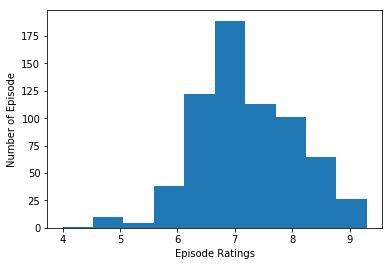

In [75]:
plt.hist(ratings, bins=10)
plt.xlabel("Episode Ratings")
plt.ylabel("Number of Episode")

from statistics import mode
print("modal rating is",mode(ratings))
print("the min is:{}, max is:{}". format(min(ratings), max(ratings)))

Next, use `sklearn.mixture.GaussianMixture` to fit a Mixture of Gaussians to the Simpsons rating distribution. Since we are trying to distinguish between good and bad ratings, we only need 2 gaussians.

* What are the means for the two Gaussians fit by the model? __Answer: 6.8 and 8.2__
 
 What about the standard deviations? __Answer: they are 0.597 and 0.474 NOTE : standard deviation (sigma), is the square root of covariance (sigma squared)__

In [76]:
ratings = np.asarray(ratings)
ratings = ratings.reshape(-1,1)
gm = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )
gm.fit(ratings)
import math 
print("the means are", gm.means_)
covariance = np.array(gm.covariances_)
std=np.sqrt(covariance)
print("the standard deviation are", std)


the means are [[6.7734211 ]
 [8.17942889]]
the standard deviation are [[[0.59689303]]

 [[0.4741226 ]]]


Finally, using the `GaussianMixture.predict()` method, we can use maximum likelihood to estimate which distribution, good or bad, each episode belongs to. In the cell below, count the number of episodes predicted to be in the "good" distribution per season, and plot using `plt.plot`.

* Where is the notable drop-off point? __Answer: Around Season 10__ (Season 9 is the last "good season" with a lot of good episodes, from Season 10 onwards the ratio of good vs bad episode is a lot lower thn previous seasons, with season 9 being 0.8, season 10 being 0.4 and season 11 being 0.2)
* When is the first season with 0 good episodes?Answer: __Season 15__

In [77]:
simpsons = dict(sorted(list(simpsons.items()), key=lambda x: x[0]))
ratings =[]
season =[]
for key, val_dict in simpsons.items():  
  #print("key: {}, val: {}".format(key, val_dict))
  season_rating= list(val_dict.values())
  ratings.extend(season_rating)
  num_season = len(season_rating)
  key_l=[key]*num_season
  season.extend(key_l)
# print(len(ratings), ratings)
# print(len(season), season)
ratings = np.asarray(ratings)
ratings = ratings.reshape(-1,1)
gm = GaussianMixture(n_components = 2,
                    covariance_type = 'full', random_state=0, )

gm.fit(ratings)
result = gm.predict(ratings)
# for i in range(30):
#   print(result[i],ratings[i])
# we know that 1 is good seasons and 0 is bad season   
#there are 32 seasons and 669 episodes in total

good = [0] * 32
bad = [0] * 32

for i in range(32):
  for j in range(669):
    if season[j] == (i+1) and result[j] ==1:
      good[i]+=1
    elif season [j] == (i+1) and result [j] ==0:
      bad[i]+=1
print("number of good episode in each season is ", good)
print("number of bad episode in each season is", bad)




number of good episode in each season is  [9, 18, 24, 21, 21, 24, 24, 24, 20, 10, 4, 5, 4, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0]
number of bad episode in each season is [4, 4, 0, 1, 1, 1, 1, 1, 5, 13, 18, 16, 18, 21, 22, 21, 22, 21, 19, 21, 23, 22, 20, 22, 21, 21, 21, 21, 21, 23, 7, 1]


ratio of good episode per season: [0.6923076923076923, 0.8181818181818182, 1.0, 0.9545454545454546, 0.9545454545454546, 0.96, 0.96, 0.96, 0.8, 0.43478260869565216, 0.18181818181818182, 0.23809523809523808, 0.18181818181818182, 0.045454545454545456, 0.0, 0.0, 0.0, 0.045454545454545456, 0.05, 0.0, 0.0, 0.0, 0.09090909090909091, 0.0, 0.045454545454545456, 0.045454545454545456, 0.045454545454545456, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0, 0.5, 'Number of Good Episodes')

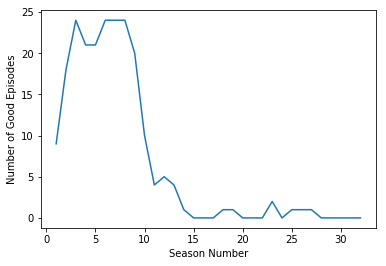

In [78]:
# code to find the drop off points, and plot season number vs good episodes
x_axis=[0]*32
ratio=[0]*32
for i in range(32):
  x_axis[i]=i+1
  ratio [i]=good[i]/(bad[i]+good[i])
print("ratio of good episode per season:",ratio)
  
plt.plot(x_axis,good)
plt.xlabel("Season Number")
plt.ylabel("Number of Good Episodes")
#plt.plot(x_axis,ratio)

## Exercises

Now we are going to work with a credit card fraud dataset (more detail can be found [here](https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3)). This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load up the dataset using Pandas' `read_csv` function. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there?[1] Answer:__284807__
* What features in the dataset are present aside from the 28 main features?[1] Answer:__Aside from the 28 main features, there are also 2 additional features: the feature "Amount", and the target feature "Class". __
* Why do you think the main features are given to us in this way?[1] Answer: __Due to confidentiality issues with the credit card holders, the data collector cannot provide us the original feature names.We don't know if there are any correlation between different features, so we'll just anayze the trend of the data without the feature names__
* Which column contains the targets? Can you figure out what the values correspond to?[1] Answer: __The last column "Class" contain the target. Value of 1 means fraud and 0 means not fraud transaction.__

In [79]:
pip install wget

In [80]:
import wget
wget.download('https://github.com/alexwolson/APS1070_data/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (1).gz'

In [81]:
import pandas as pd
!tar -zxvf creditcard.tar.gz
df = pd.read_csv('creditcard.csv') 
df.head()

creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [82]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


It's always important when looking at a new dataset to figure out how many rows we have for each class.

* What is the percentage of entries in the dataset for each class?[1] Answer: __percent of 0s:99.83%, percent of 1s: 0.17%__
* Why might this pose a problem with methods we have looked at so far?[1] Answer: __One cluster is significantly smaller than the other cluster, so the model might misidentify some of the "1" data points as outliers for the "0" cluster instead of identifying them as another group.__



In [83]:
df.groupby('Class').count()

percent_1=492/284807*100
percent_0=284315/284807 *100
print(percent_0,percent_1)

99.82725143693798 0.1727485630620034


Next, split the dataset into a training and testing set using sklearn's `train_test_split` function. Use a test size of one third, and set the random state to 0.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in these exercises we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V24? Make sure to only use your training set for this.[1] __Answer: means is 0.00043, std is 0.604829__

Use the code below to set up a Gaussian object for V24.

In [84]:
target = df.Class
#print(target_data)
feature= df.drop(columns=['Class'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=1/3, random_state=0, shuffle=True)

X_train.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000,189871.000000
mean,94814.918824,0.000372,-0.002924,-0.001732,0.001473,-0.001238,0.000119,-0.001025,-0.002116,-0.000655,0.001993,-0.001024,-0.001908,0.001973,0.000831,0.000131,0.000074,0.000461,-0.000256,0.000879,0.000259,-0.000715,-0.000459,-0.000638,0.000430,0.000292,-0.000093,-0.000055,0.000062,88.699177
std,47511.999404,1.965230,1.657286,1.516706,1.418178,1.372619,1.329297,1.229861,1.209809,1.102927,1.092432,1.019962,0.996665,0.997838,0.956524,0.916361,0.875868,0.850413,0.837477,0.814888,0.771013,0.742658,0.727525,0.629796,0.604829,0.521279,0.481567,0.401732,0.323935,246.554200
min,0.000000,-46.855047,-63.344698,-33.680984,-5.560118,-42.147898,-23.496714,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-17.769143,-5.791881,-19.214325,-4.498945,-14.129855,-24.019099,-9.498746,-7.213527,-23.646890,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.534330,-22.565679,-11.710896,0.000000
25%,54141.500000,-0.921376,-0.601745,-0.893290,-0.848109,-0.691784,-0.769025,-0.554424,-0.209051,-0.646282,-0.535012,-0.762984,-0.407251,-0.647332,-0.424401,-0.584250,-0.468088,-0.483769,-0.498850,-0.456571,-0.211685,-0.229427,-0.544875,-0.161943,-0.354034,-0.316101,-0.327351,-0.070797,-0.052940,5.600000
50%,84634.000000,0.020396,0.063697,0.177130,-0.017589,-0.055078,-0.274434,0.039837,0.021732,-0.050553,-0.091885,-0.033737,0.138314,-0.012122,0.051491,0.048540,0.067301,-0.064825,-0.002939,0.004249,-0.063044,-0.029146,0.006675,-0.010759,0.040788,0.017785,-0.052063,0.001075,0.011141,21.990000
75%,139384.500000,1.316772,0.803005,1.025274,0.745195,0.609613,0.398878,0.569301,0.326718,0.596822,0.459078,0.738048,0.617276,0.664864,0.494297,0.649635,0.522818,0.400911,0.499805,0.459889,0.132628,0.186509,0.530404,0.147723,0.438864,0.350979,0.241118,0.090521,0.078085,77.500000
max,172792.000000,2.451888,22.057729,9.382558,16.715537,34.099309,23.917837,44.054461,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.825654,7.059132,9.207059,5.041069,5.572113,39.420904,27.202839,10.503090,22.083545,4.022866,7.519589,3.463246,12.152401,22.620072,19656.530000


In [0]:


from scipy import stats

norm = stats.norm(
    
)

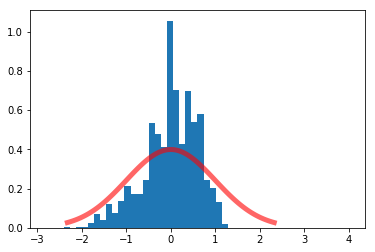

In [86]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(X_train['V24'].values, density=True, histtype='stepfilled', bins=50);
plt.show()

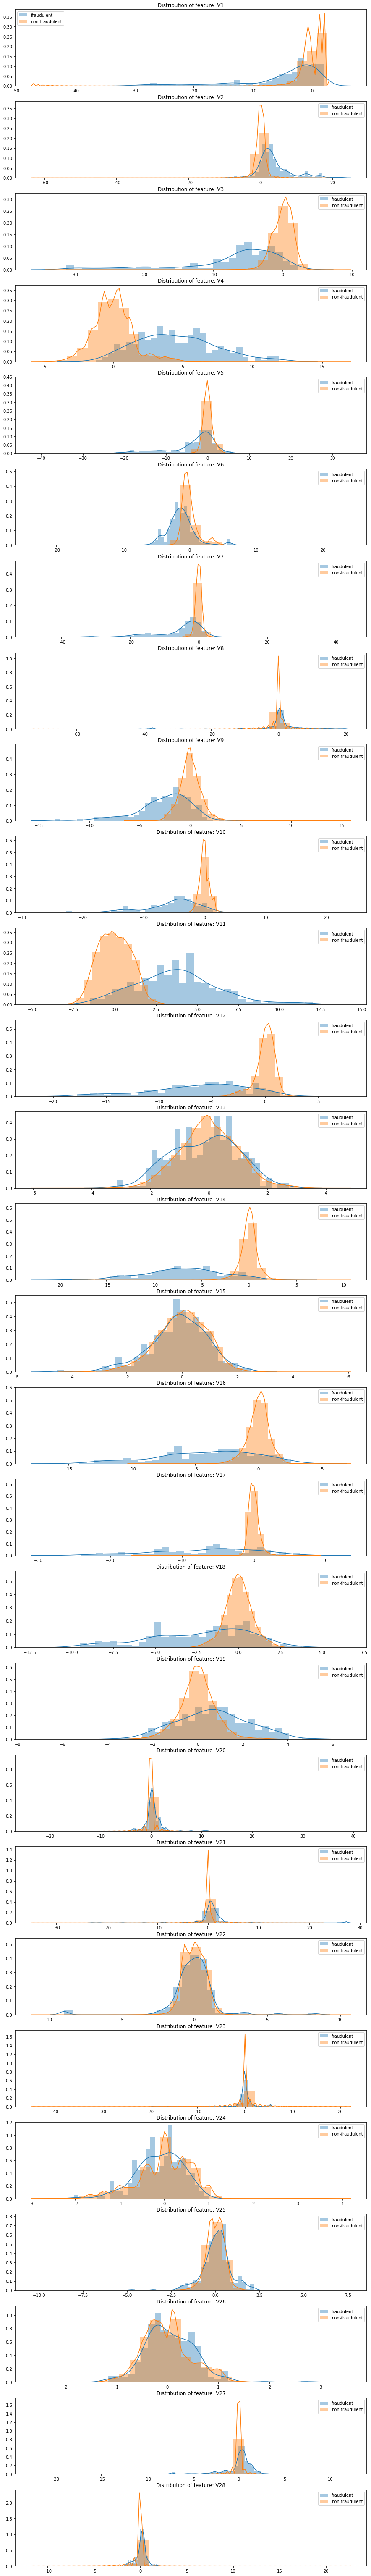

In [87]:
import matplotlib.gridspec as gridspec
import seaborn as sns
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0],bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Build an outlier detection model using a Mixture of Gaussians using a subset of features of your choice (pick a few) and a number of mixture components. Report the precision@k for k=1, 10 and 100 (on test data). Repeat this model creation process at least 4 more times, each time selecting different parameters (features selected, number of mixture components), and reporting the precision as above. Organize your findings in a table or plot and describe your findings. What can you conclude about what models work best? [3]

__Answer: See graphs and dataframe called "result" below. I have explored total of 24 models with 6 different sets of features and 4 different number of components for each set of features. For credit card fraud detection, recall matters just as much as precisions if not more important(you want all the fraud hence positives to be caught even if it's false positive, but want to minimze false negative where a fraud is not detected).___ 

__So with those two metrics calculated, overall the model with 3 most distinctive features (V11,V12,V16) without the 'Amount' feature performed the best. Through this exploration, I found that the 'Amount' of the transaction does not necessarily have much correlation with whether the transaction is a fraud. I also found that in general less features performed better (3 featured performed better than 8 features, and 8 features performed better than 20 features). This is because including too many features that don't all have strong distinctions in distributions between fraud and none fraud transactions can lead to signicantly worse performance than having less features. I also found that in general 1 component models performed slighlty better than 2 components (although very close), and those two always perofmd much better than 5 or 10 components models. One component performed better than the rest due to the significant unbalance in data collected between the "0" non-fraud and "1" fraud classes. In the one component models, the main cluster is likely mostly "0" non-fraud class, and the outliers are mainly the "1" fraud class.__ 

__Through our metrics calculation, one of the proposed model is 3 features(V11,V12,V16) and 1 component which is includes only the features that have strong distinction between the distribution of fraudulent and non-fraudelent transactions.__

__Proposed Model 1: 3 anonymous features (V11,V12,V16) and  1 component:
  For a k of  1  the precision is  1.000  and the recall is  0.006
  For a k of  10  the precision is  0.900  and the recall is  0.055
  For a k of  100  the precision is  0.820  and the recall is  0.500__

For 8 anonymous features and  1 components including the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.700  and the recall is  0.043
For a k of  100  the precision is  0.580  and the recall is  0.354
For 8 anonymous features and  2 components including the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.700  and the recall is  0.043
For a k of  100  the precision is  0.510  and the recall is  0.311
For 8 anonymous features and  5 components including the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.200  and the recall is  0.012
For a k of  100  the precision is  0.380  and the recall is  0.232
For 8 anonymous features and  10 components including the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.000 

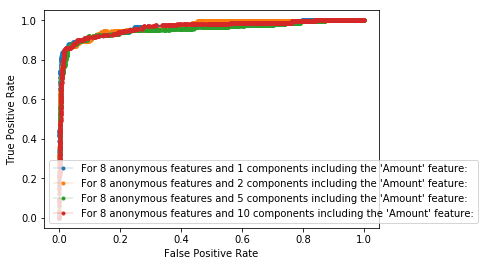

In [88]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
model_1= X_train[['V3', 'V4','V10','V11','V12','V14','V16','V17','Amount']].copy()
test_1 =X_test[['V3', 'V4','V10','V11','V12','V14','V16','V17','Amount']].copy()
model_1.head()
for j in [1,2,5,10]:
  # Model 1 is taking 9 features (8anonymous and 'Amount'), and mixture of components changes from 1,2,5,10

  gm1 = GaussianMixture(n_components = j,
                      covariance_type = 'full', random_state=0, )

  gm1.fit(model_1)

  #This part outputs the precision and recall on the test set
  p_gm = gm1.score_samples(test_1) #score_samples will compute the weighted log probabilities for each sample
  print("For 8 anonymous features and ",j,"components including the 'Amount' feature:")
  for i in [1, 10, 100]: #Let's look at 3 different k values
     mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
     precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
     recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
     print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times

  fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
  pyplot.plot(fpr_gm, tpr_gm, marker='.', linewidth=0.25, label="For 8 anonymous features and {} components including the 'Amount' feature:".format(j))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()    

For 8 anonymous features and  1 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.900  and the recall is  0.055
For a k of  100  the precision is  0.770  and the recall is  0.470
For 8 anonymous features and  2 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.900  and the recall is  0.055
For a k of  100  the precision is  0.580  and the recall is  0.354
For 8 anonymous features and  5 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.700  and the recall is  0.043
For a k of  100  the precision is  0.550  and the recall is  0.335
For 8 anonymous features and  10 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.500  and the

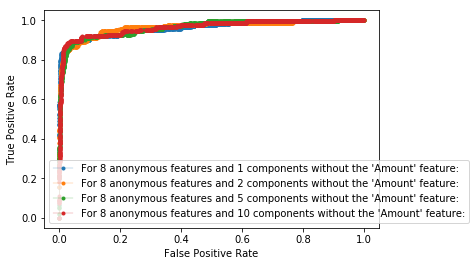

In [89]:
# Model 2 is 8 features (without Amount) , and mixture of components changes from 1,2,5,10
model_2= X_train[['V3', 'V4','V10','V11','V12','V14','V16','V17']].copy()
test_2 =X_test[['V3', 'V4','V10','V11','V12','V14','V16','V17']].copy()
model_2.head()
for j in [1,2,5,10]:
  gm2 = GaussianMixture(n_components = j,
                      covariance_type = 'full', random_state=0, )
  gm2.fit(model_2)

  #This part outputs the precision and recall on the test set
  p_gm = gm2.score_samples(test_2) #score_samples will compute the weighted log probabilities for each sample
  print("For 8 anonymous features and ",j,"components without the 'Amount' feature:")

  for i in [1, 10, 100]: #Let's look at 3 different k values
     mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
     precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
     recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
     print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall)
  fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
  pyplot.plot(fpr_gm, tpr_gm, marker='.', linewidth=0.25, label="For 8 anonymous features and {} components without the 'Amount' feature:".format(j))

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend() 


For 6 anonymous features and  1 components including the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.500  and the recall is  0.030
For a k of  100  the precision is  0.490  and the recall is  0.299
For 6 anonymous features and  2 components including the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.700  and the recall is  0.043
For a k of  100  the precision is  0.480  and the recall is  0.293
For 6 anonymous features and  5 components including the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.400  and the recall is  0.024
For a k of  100  the precision is  0.430  and the recall is  0.262
For 6 anonymous features and  10 components including the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.000 

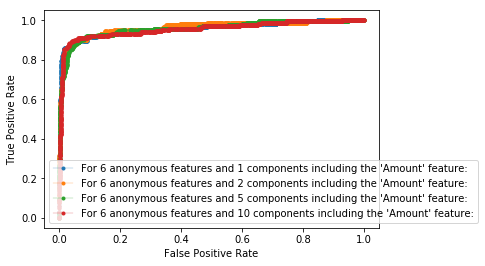

In [90]:
# Model 3 is only using 6 most likely features with 'Amount' (by separation of fradulent and non-fradulent ditributions), and mixture of components changes from 1,2,5,10
model_3= X_train[['V3', 'V4','V10','V11','V12','V14','Amount']].copy()
test_3 =X_test[['V3', 'V4','V10','V11','V12','V14','Amount']].copy()
model_3.head()
for j in [1,2,5,10]:
  gm3 = GaussianMixture(n_components = j,
                      covariance_type = 'full', random_state=0, )
  gm3.fit(model_3)

  #This part outputs the precision and recall on the test set
  p_gm = gm3.score_samples(test_3) #score_samples will compute the weighted log probabilities for each sample
  print("For 6 anonymous features and ",j,"components including the 'Amount' feature:")
  for i in [1, 10, 100]: #Let's look at 3 different k values
     mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
     precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
     recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
     print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times
  fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
  pyplot.plot(fpr_gm, tpr_gm, marker='.', linewidth=0.25, label="For 6 anonymous features and {} components including the 'Amount' feature:".format(j))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()    

For 6 anonymous features and  1 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.889  and the recall is  0.049
For a k of  100  the precision is  0.760  and the recall is  0.463
For 6 anonymous features and  2 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.900  and the recall is  0.055
For a k of  100  the precision is  0.600  and the recall is  0.366
For 6 anonymous features and  5 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.700  and the recall is  0.043
For a k of  100  the precision is  0.510  and the recall is  0.311
For 6 anonymous features and  10 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.700  and the

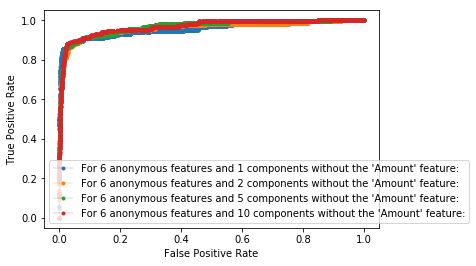

In [91]:
# Model 4 is only using 6 most likely features without 'Amount' (by separation of fradulent and non-fradulent ditributions), and mixture of components changes from 1,2,5,10
model_4= X_train[['V3', 'V4','V10','V11','V12','V14']].copy()
test_4 =X_test[['V3', 'V4','V10','V11','V12','V14']].copy()
model_4.head()
for j in [1,2,5,10]:
  gm4 = GaussianMixture(n_components = j,
                      covariance_type = 'full', random_state=0, )
  gm4.fit(model_4)

  #This part outputs the precision and recall on the test set
  p_gm = gm4.score_samples(test_4) #score_samples will compute the weighted log probabilities for each sample
  print("For 6 anonymous features and ",j,"components without the 'Amount' feature:")
  for i in [1, 10, 100]: #Let's look at 3 different k values
     mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
     precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
     recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
     print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times
  fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
  pyplot.plot(fpr_gm, tpr_gm, marker='.', linewidth=0.25, label="For 6 anonymous features and {} components without the 'Amount' feature:".format(j))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()    

For 3 anonymous features (V11,V12,V16) and  1 components without the 'Amount' feature:
For a k of  1  the precision is  1.000  and the recall is  0.006
For a k of  10  the precision is  0.900  and the recall is  0.055
For a k of  100  the precision is  0.820  and the recall is  0.500
For 3 anonymous features (V11,V12,V16) and  2 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.900  and the recall is  0.055
For a k of  100  the precision is  0.768  and the recall is  0.463
For 3 anonymous features (V11,V12,V16) and  5 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.900  and the recall is  0.055
For a k of  100  the precision is  0.750  and the recall is  0.457
For 3 anonymous features (V11,V12,V16) and  10 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is

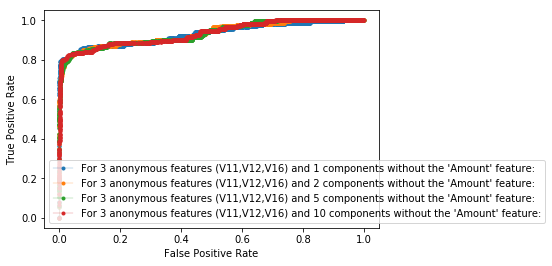

In [92]:
# Model 5 is only using 3 most likely features without 'Amount' (by separation of fradulent and non-fradulent ditributions), and mixture of components changes from 1,2,5,10
model_5= X_train[['V11','V12','V16']].copy()
test_5 =X_test[['V11','V12','V16']].copy()
model_5.head()
for j in [1,2,5,10]:
  gm5 = GaussianMixture(n_components = j,
                      covariance_type = 'full', random_state=0, )
  gm5.fit(model_5)

  #This part outputs the precision and recall on the test set
  p_gm = gm5.score_samples(test_5) #score_samples will compute the weighted log probabilities for each sample
  print("For 3 anonymous features (V11,V12,V16) and ",j,"components without the 'Amount' feature:")
  for i in [1, 10, 100]: #Let's look at 3 different k values
     mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
     precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
     recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
     print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times
  fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
  pyplot.plot(fpr_gm, tpr_gm, marker=".", linewidth=0.25, label="For 3 anonymous features (V11,V12,V16) and {} components without the 'Amount' feature:".format(j))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()    

For first 20 features features and  1 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.100  and the recall is  0.006
For a k of  100  the precision is  0.390  and the recall is  0.238
For first 20 features features and  2 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.100  and the recall is  0.006
For a k of  100  the precision is  0.360  and the recall is  0.220
For first 20 features features and  5 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the precision is  0.000  and the recall is  0.000
For a k of  100  the precision is  0.090  and the recall is  0.055
For first 20 features features and  10 components without the 'Amount' feature:
For a k of  1  the precision is  0.000  and the recall is  0.000
For a k of  10  the prec

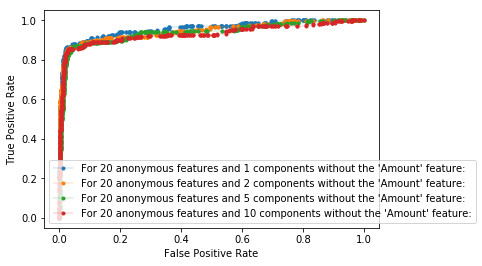

In [93]:
# Model 6 is only using first 20 features without 'Amount' (by separation of fradulent and non-fradulent ditributions), and mixture of components changes from 1,2,5,10
model_6= X_train.iloc[:,0:21].copy()
test_6 =X_test.iloc[:,0:21].copy()
model_6.head()
for j in [1,2,5,10]:
  gm6 = GaussianMixture(n_components = j,
                      covariance_type = 'full', random_state=0, )
  gm6.fit(model_6)

  #This part outputs the precision and recall on the test set
  p_gm = gm6.score_samples(test_6) #score_samples will compute the weighted log probabilities for each sample
  print("For first 20 features features and ",j,"components without the 'Amount' feature:")
  for i in [1, 10, 100]: #Let's look at 3 different k values
     mn_gm = sorted(p_gm)[i] #We sort the points by probability, as before
     precision = precision_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using precision
     recall = recall_score(y_test, p_gm < mn_gm) #Here, we compare y_test labels to our picks using recall
     print('For a k of ',i,' the precision is ', '%.3f' % precision,' and the recall is ', '%.3f' % recall) #We print precision and recall three times
  fpr_gm, tpr_gm, _ = roc_curve(y_test, 1-p_gm)
  pyplot.plot(fpr_gm, tpr_gm, marker='.', linewidth=0.25, label="For 20 anonymous features and {} components without the 'Amount' feature:".format(j))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()   

In [94]:
#Since it might be difficult to see all the differences from the graphs, we'll build a dataframe table of all 24 models performance printed below
data = [['Y',8,1,0.000,0.000,0.700,0.043,0.580,0.3541],
        ['Y',8,2,0.000,0.000,0.700,0.043,0.510,0.311],
        ['Y',8,5,0.000,0.000,0.20,0.012,0.380,0.232],
        ['Y',8,10,0.000,0.000,0.00,0.00,0.360,0.220],        
        ['N',8,1,0.0,0.00,0.9,0.055,0.77,0.47],
        ['N',8,2,0.00,0.00,0.9,0.055,0.58,0.354],
        ['N',8,5,0.00,0.00,0.7,0.043,0.550,0.335],
        ['N',8,10,0.000,0.000,0.5,0.03,0.43,0.262],        
        ['Y',6,1,0.000,0.000,0.500,0.030,0.490,0.299],
        ['Y',6,2,0.000,0.000,0.700,0.043,0.480,0.293],
        ['Y',6,5,0.000,0.000,0.400 ,0.024,0.430 ,0.262],
        ['Y',6,10,0.000,0.000,0.00,0.000,0.310,0.189],         
        ['N',6,1,0.000,0.000,0.889,0.049,0.760,0.463],
        ['N',6,2,0.000,0.000, 0.900,0.055,0.600,0.366],
        ['N',6,5,0.000,0.000,0.700,0.043,0.510,0.311],
        ['N',6,10,0.000,0.000,0.700,0.043,0.510,0.311],         
        ['N',3,1,1.0,0.006,0.900,0.055,0.820 ,0.500],
        ['N',3,2,0.00,0.00,0.900,0.055,0.768,0.463],
        ['N',3,5,0.00,0.00,0.900,0.055,0.750,0.457],
        ['N',3,10,0.000,0.00,0.800,0.049,0.540,0.329],       
        ['N',20,1,0.000,0.000,0.100,0.006,0.39,0.238],
        ['N',20,2,0.000,0.000,0.100,0.006,0.360,0.220],
        ['N',20,5,0.000,0.000,0.000,0.000,0.090,0.055],
        ['N',20,10,0.000,0.000,0.000,0.000,0.350,0.213],
       ] 
result = pd.DataFrame(data, columns = ['Amount Feature','Number of Anonymous Features' ,'Component Number', 'Precision K=1','Recall K=1','Precision K=10','Recall K=10','Precision K=100','Recall K=100'])
result.head(24)

,Amount Feature,Number of Anonymous Features,Component Number,Precision K=1,Recall K=1,Precision K=10,Recall K=10,Precision K=100,Recall K=100
0,Y,8,1,0.0,0.000,0.700,0.043,0.580,0.3541
1,Y,8,2,0.0,0.000,0.700,0.043,0.510,0.3110
2,Y,8,5,0.0,0.000,0.200,0.012,0.380,0.2320
3,Y,8,10,0.0,0.000,0.000,0.000,0.360,0.2200
4,N,8,1,0.0,0.000,0.900,0.055,0.770,0.4700
5,N,8,2,0.0,0.000,0.900,0.055,0.580,0.3540
6,N,8,5,0.0,0.000,0.700,0.043,0.550,0.3350
7,N,8,10,0.0,0.000,0.500,0.030,0.430,0.2620
8,Y,6,1,0.0,0.000,0.500,0.030,0.490,0.2990
9,Y,6,2,0.0,0.000,0.700,0.043,0.480,0.2930


In [95]:
# we can see that in general models without 'Amount' feature actually performed better
print(result.groupby('Amount Feature')['Precision K=1'].mean())
print(result.groupby('Amount Feature')['Precision K=10'].mean())
print(result.groupby('Amount Feature')['Precision K=100'].mean())
print(result.groupby('Amount Feature')['Recall K=1'].mean())
print(result.groupby('Amount Feature')['Recall K=10'].mean())
print(result.groupby('Amount Feature')['Recall K=100'].mean())

Amount Feature
N    0.0625
Y    0.0000
Name: Precision K=1, dtype: float64
Amount Feature
N    0.618063
Y    0.400000
Name: Precision K=10, dtype: float64
Amount Feature
N    0.548625
Y    0.442500
Name: Precision K=100, dtype: float64
Amount Feature
N    0.000375
Y    0.000000
Name: Recall K=1, dtype: float64
Amount Feature
N    0.037437
Y    0.024375
Name: Recall K=10, dtype: float64
Amount Feature
N    0.334187
Y    0.270012
Name: Recall K=100, dtype: float64


In [96]:
without_amount= result[result['Amount Feature'] != 'Y']
# we can see that in general the less number of features performed better
print(without_amount.groupby('Number of Anonymous Features')['Precision K=1'].mean())
print(without_amount.groupby('Number of Anonymous Features')['Precision K=10'].mean())
print(without_amount.groupby('Number of Anonymous Features')['Precision K=100'].mean())
print(without_amount.groupby('Number of Anonymous Features')['Recall K=1'].mean())
print(without_amount.groupby('Number of Anonymous Features')['Recall K=10'].mean())
print(without_amount.groupby('Number of Anonymous Features')['Recall K=100'].mean())

Number of Anonymous Features
3     0.25
6     0.00
8     0.00
20    0.00
Name: Precision K=1, dtype: float64
Number of Anonymous Features
3     0.87500
6     0.79725
8     0.75000
20    0.05000
Name: Precision K=10, dtype: float64
Number of Anonymous Features
3     0.7195
6     0.5950
8     0.5825
20    0.2975
Name: Precision K=100, dtype: float64
Number of Anonymous Features
3     0.0015
6     0.0000
8     0.0000
20    0.0000
Name: Recall K=1, dtype: float64
Number of Anonymous Features
3     0.05350
6     0.04750
8     0.04575
20    0.00300
Name: Recall K=10, dtype: float64
Number of Anonymous Features
3     0.43725
6     0.36275
8     0.35525
20    0.18150
Name: Recall K=100, dtype: float64


In [97]:
# we can see that in general 1 component and 2 components performed significantly better than 5 and 10 components, with 1 component performing slightly better than 2 components overall
print(without_amount.groupby('Component Number')['Precision K=1'].mean())
print(without_amount.groupby('Component Number')['Precision K=10'].mean())
print(without_amount.groupby('Component Number')['Precision K=100'].mean())
print(without_amount.groupby('Component Number')['Recall K=1'].mean())
print(without_amount.groupby('Component Number')['Recall K=10'].mean())
print(without_amount.groupby('Component Number')['Recall K=100'].mean())

Component Number
1     0.25
2     0.00
5     0.00
10    0.00
Name: Precision K=1, dtype: float64
Component Number
1     0.69725
2     0.70000
5     0.57500
10    0.50000
Name: Precision K=10, dtype: float64
Component Number
1     0.6850
2     0.5770
5     0.4750
10    0.4575
Name: Precision K=100, dtype: float64
Component Number
1     0.0015
2     0.0000
5     0.0000
10    0.0000
Name: Recall K=1, dtype: float64
Component Number
1     0.04125
2     0.04275
5     0.03525
10    0.03050
Name: Recall K=10, dtype: float64
Component Number
1     0.41775
2     0.35075
5     0.28950
10    0.27875
Name: Recall K=100, dtype: float64
